In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
url_japan='http://ja.wikipedia.org/wiki/%E6%9D%B1%E4%BA%AC%E5%84%AA%E9%A7%BF'
df_japan=pd.read_html(url_japan,flavor='bs4')
df_jp=df_japan[6]
df_jp.head()


,回数,開催日,競馬場,距離,優勝馬,性齢,タイム,優勝騎手,管理調教師,馬主
0,第1回,1932年4月24日,目黒,2400m,ワカタカ,牡3,2:45 2/5,函館孫作,東原玉造,乾鼎一
1,第2回,1933年4月23日,目黒,2400m,カブトヤマ,牡3,2:41 0/5,大久保房松,大久保房松,前川道平
2,第3回,1934年4月22日,東京,2400m,フレーモア,牡3,2:45 2/5,大久保亀治,尾形景造,土田荘助
3,第4回,1935年4月29日,東京,2400m,ガヴアナー,牡3,2:42 1/5,井川為男,布施季三,高橋錬逸
4,第5回,1936年4月29日,東京,2400m,トクマサ,牡3,2:42 1/5,伊藤正四郎,尾形景造,山中清兵衛


In [3]:
url_UK='https://en.wikipedia.org/wiki/Epsom_Derby'
df_UK=pd.read_html(url_UK,flavor='bs4')
df_Eng=df_UK[11]
df_Eng.head()

,Year,Winner,Jockey,Trainer,Owner,Dist. [a],Time
0,1780,Diomed,Sam Arnull,R. Teasdale,Sir Charles Bunbury,NaN,NaN
1,1781,Young Eclipse,Charles Hindley,NaN,Dennis O'Kelly,NaN,NaN
2,1782,Assassin,Sam Arnull,Frank Neale,3rd Earl of Egremont,NaN,NaN
3,1783,Saltram,Charles Hindley,Frank Neale,John Parker,NaN,NaN
4,1784,Serjeant,John Arnull,NaN,Dennis O'Kelly,NaN,NaN


In [4]:
url_Ireland='https://en.wikipedia.org/wiki/Irish_Derby'
df_irel=pd.read_html(url_Ireland,flavor='bs4')
df_ire=df_irel[7]
df_ire.tail(10)

,Year,Winner,Jockey,Trainer,Owner,Time
67,2013,Trading Leather,Kevin Manning,Jim Bolger,Mrs J S Bolger,2:27.17
68,2014,Australia,Joseph O'Brien,Aidan O'Brien,Smith / Magnier / Tabor,2:33.19
69,2015,Jack Hobbs,William Buick,John Gosden,Godolphin & Partners,2:34:93
70,2016,Harzand,Pat Smullen,Dermot Weld,Aga Khan IV,2:38:05
71,2017,Capri,Seamie Heffernan,Aidan O'Brien,Smith / Magnier / Tabor,2:35.45
72,2018,Latrobe,Donnacha O'Brien,Joseph O'Brien,Lloyd Williams,2:32.62
73,2019,Sovereign,Padraig Beggy,Aidan O'Brien,Magnier / Tabor / Smith,2:31.50
74,2020,Santiago,Seamie Heffernan,Aidan O'Brien,Tabor / Smith / Magnier,2:38.17
75,2021,Hurricane Lane,William Buick,Charlie Appleby,Godolphin,2:33.85
76,2022,Westover,Colin Keane,Ralph Beckett,Juddmonte,2:34.80


In [5]:
kaisuilist=df_jp['開催日'].tolist()
kaisui=[]
for i in kaisuilist:
    item=i.split('年')
    kaisui.append(int(item[0]))


In [6]:
timelist=df_jp['タイム'].tolist()
time=[]
for i in timelist:
    item=i.split(':')
    min=float(item[0])*60
    sec=item[1].split(' ')
    if len(sec)==2 :
        sec1=sec[1].split('/')
        sec1=float(sec1[0])*0.2
        sec=float(sec[0])+sec1
    else:
        sec=float(sec[0])
    tot=min+sec
    time.append(tot)
time

[165.4,
 161.0,
 165.4,
 162.2,
 162.2,
 153.6,
 153.4,
 156.2,
 154.4,
 160.2,
 153.0,
 151.8,
 159.2,
 155.0,
 153.4,
 153.8,
 164.4,
 151.2,
 151.8,
 154.6,
 154.8,
 156.6,
 156.2,
 151.0,
 151.2,
 158.2,
 150.7,
 150.2,
 151.2,
 148.7,
 148.8,
 157.5,
 151.1,
 150.9,
 151.1,
 155.1,
 150.0,
 151.6,
 148.6,
 147.8,
 147.4,
 148.0,
 147.6,
 148.7,
 147.8,
 147.3,
 147.8,
 148.5,
 146.5,
 149.5,
 149.3,
 151.0,
 148.9,
 147.8,
 146.3,
 148.8,
 145.3,
 145.9,
 147.8,
 145.5,
 145.7,
 147.3,
 146.1,
 145.9,
 145.8,
 145.3,
 146.2,
 147.0,
 146.2,
 148.5,
 143.3,
 143.3,
 147.9,
 144.5,
 146.7,
 153.7,
 146.9,
 150.5,
 143.8,
 144.3,
 144.6,
 143.2,
 144.0,
 146.9,
 143.6,
 142.6,
 144.1,
 142.5,
 141.9]

0.7155751123428278
4.3853433224936194e-11


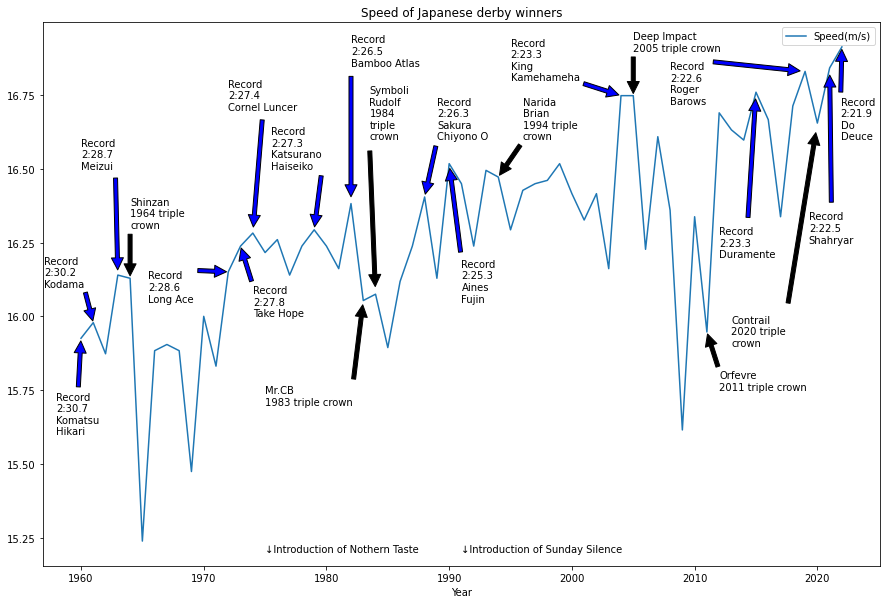

In [7]:
Jpderby=pd.DataFrame()
Jpderby['Year']=kaisui
Jpderby['Time']=time
speed=[]
for i in time:
    spd=2400/i
    speed.append(spd)
Jpderby['Speed(m/s)']=speed
Jpclean=Jpderby[Jpderby['Year']>=1960]
Jpclean.plot(kind='line',x='Year',y='Speed(m/s)',title='Speed of Japanese derby winners',figsize=(15,10))

plt.annotate('Shinzan\n1964 triple\ncrown',xy=(1964,16.129032),xytext=(1964,16.3),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Mr.CB\n1983 triple crown',xy=(1983,16.053512),xytext=(1975,15.7),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Symboli\nRudolf\n1984\ntriple\ncrown',xy=(1984,16.075017),xytext=(1983.5,16.6),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Narida\nBrian \n1994 triple\ncrown',xy=(1994,16.472203),xytext=(1996,16.6),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Deep Impact\n2005 triple crown',xy=(2005,16.748081),xytext=(2005,16.9),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Orfevre\n2011 triple crown',xy=(2011,15.946844),xytext=(2012,15.75),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Contrail\n2020 triple\ncrown',xy=(2020,16.655101),xytext=(2013,15.9),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Record\n2:30.7\nKomatsu\nHikari',xy=(1960,15.925680),xytext=(1958,15.6),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:30.2\nKodama',xy=(1961,15.978695),xytext=(1957,16.1),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:28.7\nMeizui',xy=(1963,16.139879),xytext=(1960,16.5),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:28.6\nLong Ace',xy=(1972,16.150740),xytext=(1965.5,16.05),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:27.8\nTake Hope',xy=(1973,16.238160),xytext=(1974,16.0),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:27.4\nCornel Luncer',xy=(1974,16.282225),xytext=(1972,16.7),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:27.3\nKatsurano\nHaiseiko',xy=(1979,16.293279),xytext=(1975.5,16.5),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:26.5\nBamboo Atlas',xy=(1982,16.382253),xytext=(1982,16.85),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:26.3\nSakura\nChiyono O',xy=(1988,16.404648),xytext=(1989,16.6),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:25.3\nAines\nFujin',xy=(1990,16.517550),xytext=(1991,16.05),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:23.3\nKing\nKamehameha',xy=(2004,16.748081),xytext=(1995,16.8),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:23.3\nDuramente',xy=(2015,16.759777),xytext=(2012,16.2),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:22.6\nRoger\nBarows',xy=(2019,16.830295),xytext=(2008,16.72),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:22.5\nShahryar',xy=(2021,16.842105),xytext=(2019.3,16.25),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record\n2:21.9\nDo\nDeuce',xy=(2022,16.913319),xytext=(2021.9,16.6),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('↓Introduction of Nothern Taste',xy=(1975,15.2),xytext=(1975,15.2))
plt.annotate('↓Introduction of Sunday Silence',xy=(1991,15.2),xytext=(1991,15.2))
pcoef_Jpn,pval_Jpn=sp.stats.pearsonr(Jpclean['Year'],Jpclean['Speed(m/s)'])
print(pcoef_Jpn)
print(pval_Jpn)

In [8]:
df_ire=df_ire.astype({'Year': 'int32'})
dfirec=df_ire[df_ire['Year']>=1960]
IrYear=dfirec['Year'].tolist()
IrTime=dfirec['Time'].tolist()
Iretime=[]
for i in IrTime:
    item=i.split(':')
    min=float(item[0])*60
    if len(item)==2:
        sec=item[1]
        sec=float(sec)
        sec=round(sec,3)
        tot=min+sec
        tot=round(tot,2)
        Iretime.append(tot)
    else:
        sec2=item[1]+'.'+item[2]
        sec2=float(sec2)
        tot=min+sec2
        Iretime.append(tot)
Irespeed=[]
for i in Iretime:
    item=2414/i
    Irespeed.append(item)


0.18919825215452477
0.13751940380875227


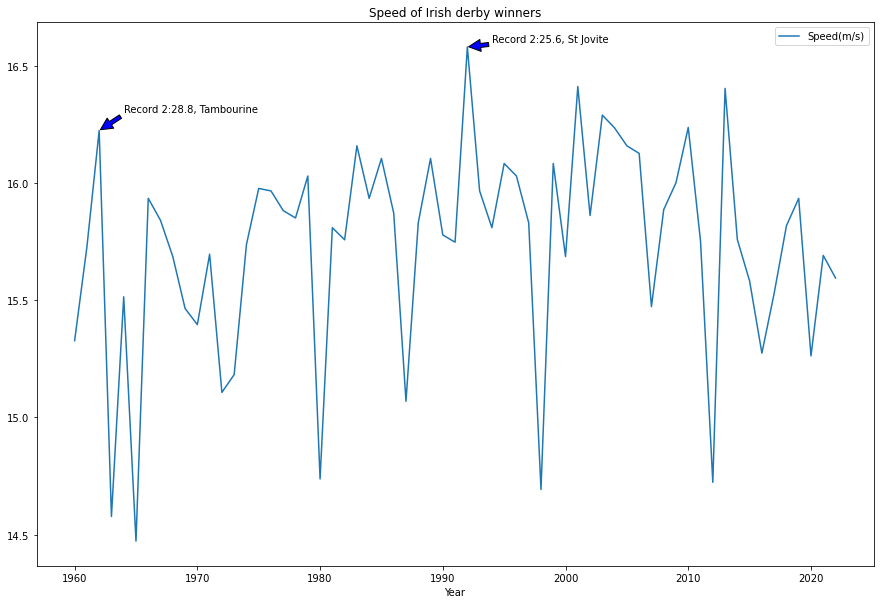

In [9]:
Irederby=pd.DataFrame()
Irederby['Year']=IrYear
Irederby['Time']=Iretime
Irederby['Speed(m/s)']=Irespeed
Irederby.plot(kind='line',x='Year',y='Speed(m/s)',title='Speed of Irish derby winners',figsize=(15,10))
plt.annotate('Record 2:25.6, St Jovite',xy=(1992,16.579670),xytext=(1994,16.6),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record 2:28.8, Tambourine',xy=(1962,16.223118),xytext=(1964,16.3),arrowprops=dict(facecolor='blue', shrink=0.05))
pcoef_Ire,pval_Ire=sp.stats.pearsonr(Irederby['Year'],Irederby['Speed(m/s)'])
print(pcoef_Ire)
print(pval_Ire)

In [10]:
Yr=df_Eng['Year'].tolist()
yr=[]
for i in Yr:
    i=i.split('(')
    i=i[0]
    i=int(i)
    yr.append(i)
df_Eng['Year']=yr
dfEngc=df_Eng[df_Eng['Year']>=1960]
EnYear=dfEngc['Year'].tolist()
EnTime=dfEngc['Time'].tolist()
Engtime=[]
for i in EnTime:
    item=i.split(':')
    min=float(item[0])*60
    if len(item)==2:
        sec=item[1]
        sec=float(sec)
        sec=round(sec,3)
        tot=min+sec
        tot=round(tot,2)
        Engtime.append(tot)
    else:
        sec2=item[1]+'.'+item[2]
        sec2=float(sec2)
        tot=min+sec2
        Engtime.append(tot)
Engspeed=[]
for i in Engtime:
    item=2420/i
    Engspeed.append(item)


0.36712544305571326
0.003079221917464243


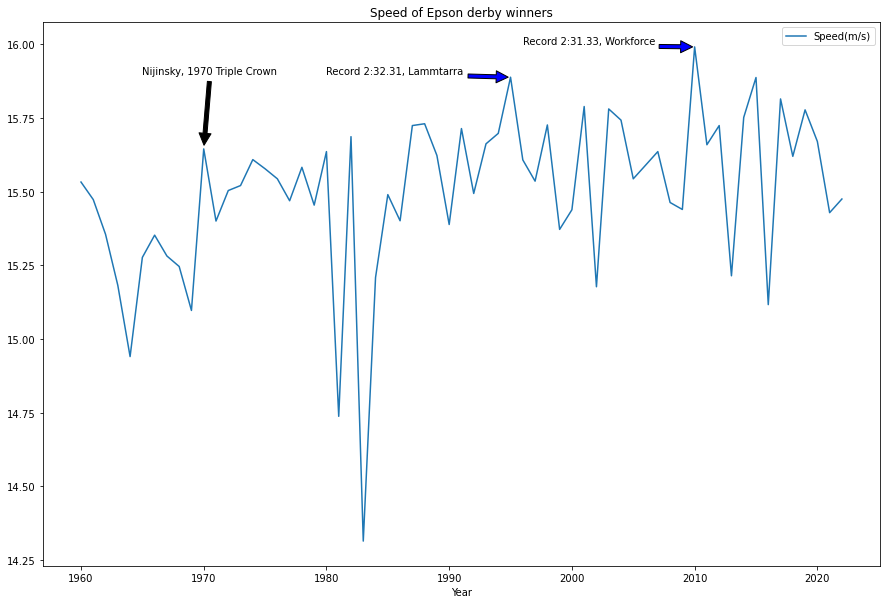

In [11]:
Engderby=pd.DataFrame()
Engderby['Year']=EnYear
Engderby['Time']=Engtime
Engderby['Speed(m/s)']=Engspeed
Engderby.plot(kind='line',x='Year',y='Speed(m/s)',title='Speed of Epson derby winners',figsize=(15,10))
plt.annotate('Record 2:31.33, Workforce',xy=(2010,15.991541),xytext=(1996,16.0),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Record 2:32.31, Lammtarra',xy=(1995,15.888648),xytext=(1980,15.9),arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Nijinsky, 1970 Triple Crown',xy=(1970,15.645203),xytext=(1965,15.9),arrowprops=dict(facecolor='black', shrink=0.05))
pcoef_Eng,pval_Eng=sp.stats.pearsonr(Engderby['Year'],Engderby['Speed(m/s)'])
print(pcoef_Eng)
print(pval_Eng)

<ipython-input-12-fd5f6d537e38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tot['Japanese Derby Speed(m/s)']=Jpclean['Speed(m/s)'].tolist()


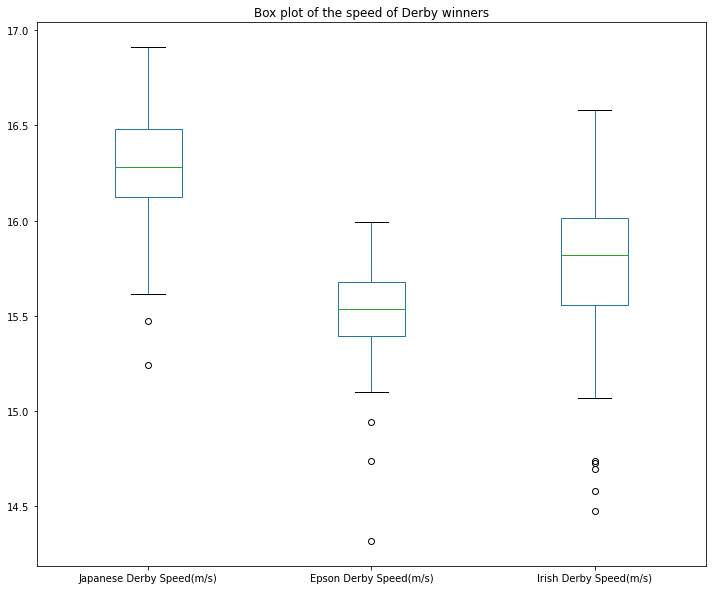

In [12]:

Tot=Jpclean[['Year']]
Tot['Japanese Derby Speed(m/s)']=Jpclean['Speed(m/s)'].tolist()
Tot['Epson Derby Speed(m/s)']=Engderby['Speed(m/s)'].tolist()
Tot['Irish Derby Speed(m/s)']=Irederby['Speed(m/s)'].tolist()
Tot=Tot[['Japanese Derby Speed(m/s)','Epson Derby Speed(m/s)','Irish Derby Speed(m/s)']]
ax=Tot.plot(kind='box',figsize=(12,10),title='Box plot of the speed of Derby winners')

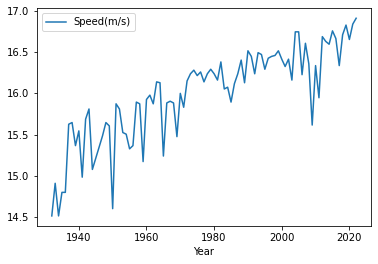

In [13]:
Jpderby.plot(kind='line',x='Year',y='Speed(m/s)')

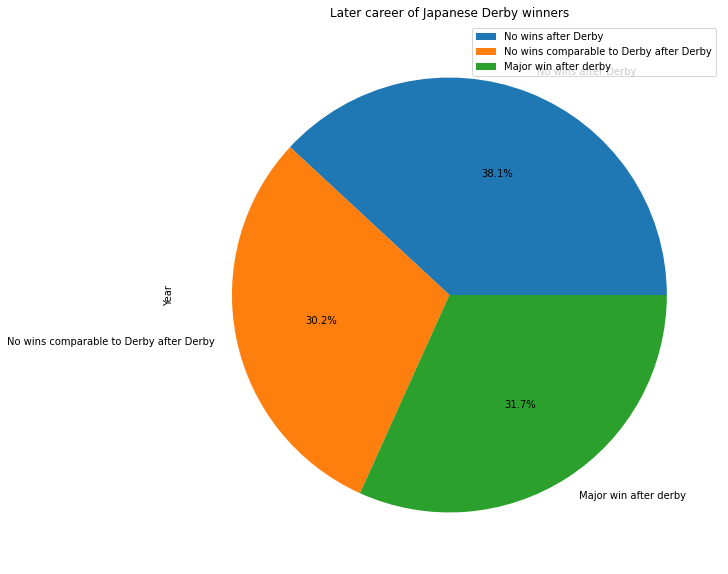

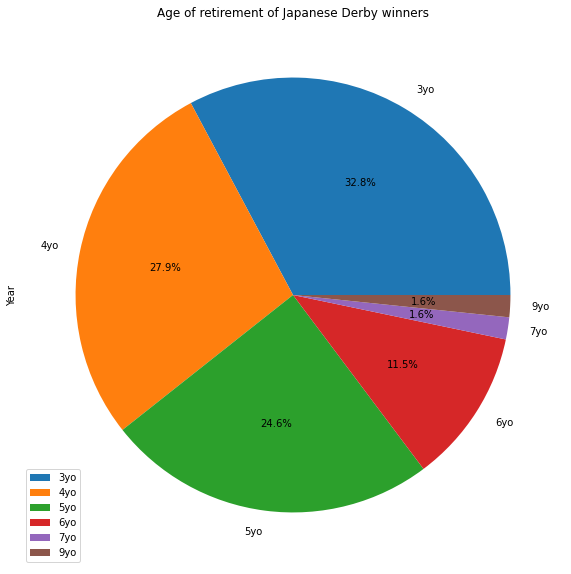

In [14]:
jpclass=pd.read_csv('Jpclassify.csv',header=None)
jpclass.columns=['Year','Category','Age of Retirement']
jpc=jpclass.groupby(by='Category').count()
jpc['Description']=['No wins after Derby','No wins comparable to Derby after Derby','Major win after derby']
jpc.set_index('Description',inplace=True)
jpc.plot(kind='pie',y='Year',figsize=(10,10),title='Later career of Japanese Derby winners',autopct='%1.1f%%')
jpa=jpclass.groupby(by='Age of Retirement').count()
jpa.plot(kind='pie',y='Year',figsize=(10,10),title='Age of retirement of Japanese Derby winners',autopct='%1.1f%%')

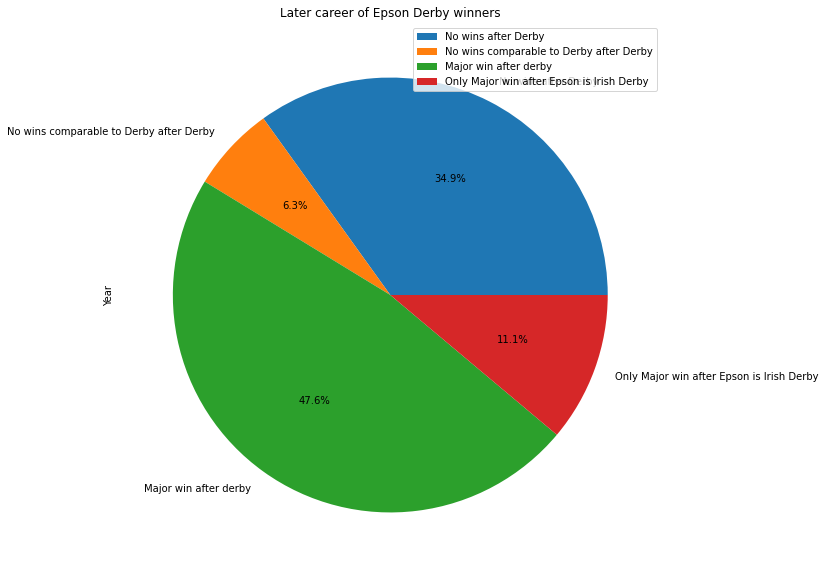

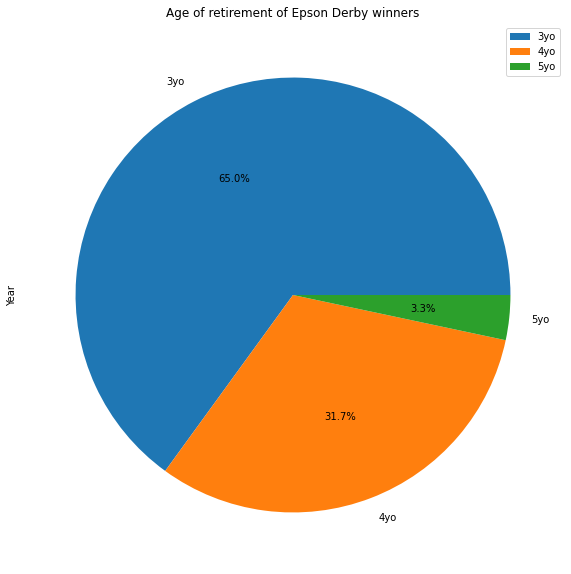

In [15]:
Enclass=pd.read_csv('Enclass.csv',header=None)
Enclass.columns=['Year','Category','Age of Retirement']
Enc=Enclass.groupby(by='Category').count()
Enc['Description']=['No wins after Derby','No wins comparable to Derby after Derby','Major win after derby','Only Major win after Epson is Irish Derby']
Enc.set_index('Description',inplace=True)
Enc.plot(kind='pie',y='Year',figsize=(10,10),title='Later career of Epson Derby winners',autopct='%1.1f%%')
Ena=Enclass.groupby(by='Age of Retirement').count()
Ena.plot(kind='pie',y='Year',figsize=(10,10),title='Age of retirement of Epson Derby winners',autopct='%1.1f%%')

                                         Year  Age of Retirement
Description                                                     
No wins after Derby                        26                 24
No wins comparable to Derby after Derby     6                  6
Major win after derby                      31                 30


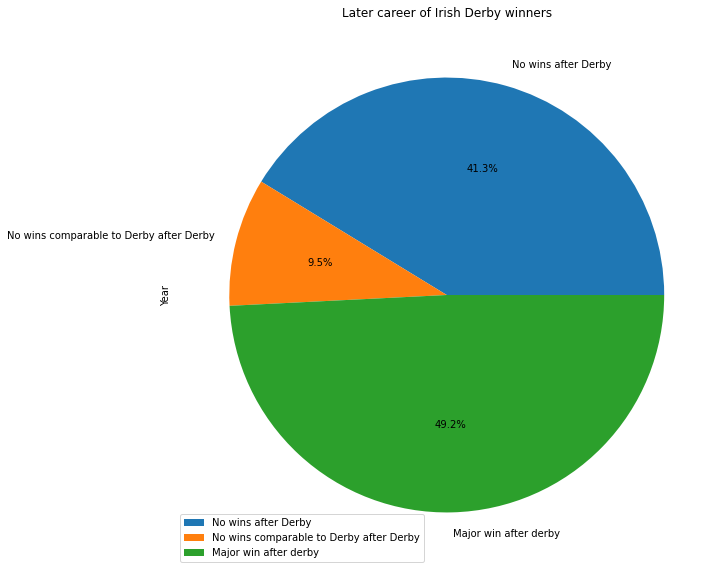

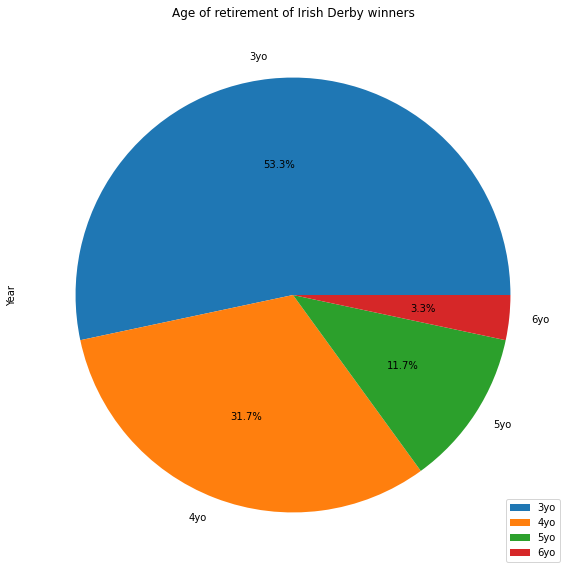

In [16]:
Ireclass=pd.read_csv('Ireclass.csv',header=None)
Ireclass.columns=['Year','Category','Age of Retirement']
Irec=Ireclass.groupby(by='Category').count()
Irec['Description']=['No wins after Derby','No wins comparable to Derby after Derby','Major win after derby']
Irec.set_index('Description',inplace=True)
print(Irec)
Irec.plot(kind='pie',y='Year',figsize=(10,10),title='Later career of Irish Derby winners',autopct='%1.1f%%')
Irea=Ireclass.groupby(by='Age of Retirement').count()
Irea.plot(kind='pie',y='Year',figsize=(10,10),title='Age of retirement of Irish Derby winners',autopct='%1.1f%%')